<a href="https://colab.research.google.com/github/Rayeenz/Sample_Projects/blob/main/KMeansClustering_RealPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tutorial of K-Means Clustering
> KMeans is the unsupervised learning
<br>

- Reference: https://realpython.com/k-means-clustering-python/

In [ ]:
# Install Dependencies

!pip install matplotlib numpy pandas seaborn scikit-learn kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Generate dummy data for clustering with sklearn.datasets.make_blobs

## features = coordinates x & y
## true_labels = assigned center point of the kmean centeroid

features, true_labels = make_blobs(
    n_samples = 200,
    centers = 3,
    cluster_std = 2.75,
    random_state = 42                  # set state for reproducable
)

In [ ]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [ ]:
# Standardization the features data to 0-1 (mean 0 / std 1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [ ]:
# set parameter for KMean fitting

kmeans = KMeans(
    init='random',       # determine the initialization techniques - default 'random', other option 'k-mean++'
    n_clusters=3,        # determine number of cluster (must be input manually)
    n_init=10,           # determine the number of round to run the initialization
    max_iter=300,        # determine the max run for each single initialization run
    random_state=42
)
kmeans

KMeans(init='random', n_clusters=3, random_state=42)

In [ ]:
# now kmeans has been config -> then to fit the data into the model

kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [ ]:
# Now seeing the result from the model fit

print('The lowest SSE value')
print(f"{kmeans.inertia_}\n")

print('Final location of the centroid')
print (f"{kmeans.cluster_centers_}\n")

print('The number of iteration required to finally converged')
print(f"{kmeans.n_iter_}")

The lowest SSE value
74.57960106819854

Final location of the centroid
[[-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]
 [ 1.19539276  0.13158148]]

The number of iteration required to finally converged
2


In [ ]:
# Fitted model labels
kmeans.labels_

array([2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0,
       2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1,
       2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1,
       0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1,
       2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2,
       0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0,
       2, 2], dtype=int32)

In [ ]:
# Select first 5 data points -> compare with Actual from make_blobs
## The difference is expected in usual case

kmeans.labels_[0:5]

array([2, 0, 1, 1, 1], dtype=int32)

## Method to determine the optimal n_clusters
1. Elbow method
> plotting the SSE for each changing n_cluster
> Finding the 'elbow' point 

2. Silhouette method
> they always be used in compliment to each other

### 1. Elbow Method

In [ ]:
## 1. Elbow method

### determine the default configs for kmeans

kmeans_kwargs = {
    "init":"random",
    "n_init":10,
    "max_iter":300,
    "random_state":42
}

# Create a list to hold the SSE values for each n_cluster

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

print(sse)


[400.0, 173.2307489387777, 74.57960106819854, 61.30474344497751, 52.2753872590211, 43.963117678328196, 38.52881875287544, 34.826374070261245, 31.138657464397568, 27.896572369402648]


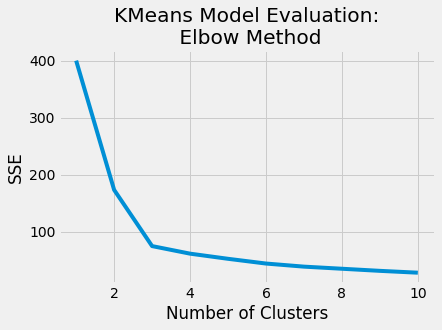

In [ ]:
# Determine the elbow point -> though maybe subjective 
## In this case, the optimal elbow is 3-cluster

plt.style.use('fivethirtyeight')
fig = sns.lineplot(x=range(1,11), y=sse)
fig.set_title('KMeans Model Evaluation:\n Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# To determine the elbow point programmatically -> Use 'kneed' package

kl = KneeLocator( range(1,11), sse, curve="convex", direction="decreasing")
kl.elbow

print(f"Optimal elbow cluster from KneeLocator is: {kl.elbow}")

Optimal elbow cluster from KneeLocator is: 3


### 2. Silhouette Method
- Silhouette requires at least 2 clusters
- Finding the **"Silhouette Coefficient"** (range from -1 to 1)
- higher number is better <br> <br>
- sklearn summarize Silhouette Coefficient into the **Silhouette Score**


In [ ]:
# Loop through K values -> compute the Silhouette Coefficient

# create list to hold coefficient
silhouette_coefficients = []

# Calculate the coefficient with starting '2-cluster'
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

print(silhouette_coefficients)

[0.5449728784485278, 0.5915043942870359, 0.4916111520533458, 0.39172760330275125, 0.36713672897176236, 0.35326132806361693, 0.36574407217979027, 0.3579272766766677, 0.3607265826184605]


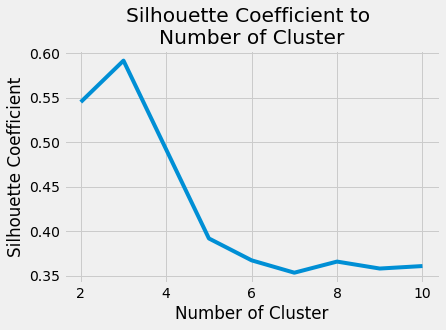


The highest silhouette coefficient is at 3-clusters


In [ ]:
# Plot to see the score with cluster

plt.style.use('fivethirtyeight')
fig = sns.lineplot(x=range(2,11), y=silhouette_coefficients)
fig.set_title("Silhouette Coefficient to \nNumber of Cluster")
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Coefficient')
plt.show()

print('\nThe highest silhouette coefficient is at 3-clusters')

## Advanced Evaluation Techniques
> Elbow/Silhouette don't respond well for below density distribution <br>
> Thus need to have more advanced techniques

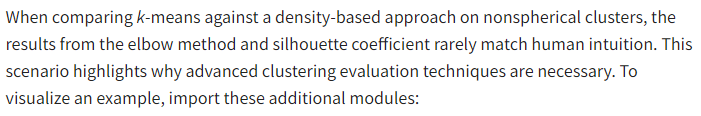

In [ ]:
# Generate dummy data to test the score from the normal scoring method

from sklearn.cluster import DBSCAN                 # another method of clustering
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [ ]:
## Generate data in cresent shape with "make_moons"

features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)

In [ ]:
print('First 5 features generated from make_moons')
print(features[0:5])
print('\nFirst 5 true labels generated from make_moons')
print(true_labels[0:5])

First 5 features generated from make_moons
[[ 0.0841541   0.1133412 ]
 [ 1.05091536  0.15471024]
 [-0.71655527  0.67560789]
 [ 0.06093168  0.92654234]
 [-1.0055248   0.33642515]]

First 5 true labels generated from make_moons
[1 0 0 0 0]


In [ ]:
# Scale the features prior to fit to model

scaled_features = scaler.fit_transform(features)
print(scaled_features[0:5])

[[-0.48023085 -0.28032707]
 [ 0.62771081 -0.19665978]
 [-1.39787132  0.85683564]
 [-0.50684454  1.36434089]
 [-1.72904034  0.17085164]]


In [ ]:
# Instantiate k-means and dbscan algorithms

kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit algorithm to the features

kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

DBSCAN(eps=0.3)

In [ ]:
# Compute the silhouette score for each algorythm

kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
print(f"kmeans_silhouette: {kmeans_silhouette} -> higher is better")

dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round(2)
print(f"dbscan_silhouette: {dbscan_silhouette}")

kmeans_silhouette: 0.5 -> higher is better
dbscan_silhouette: 0.38


#### Silhouette score shows that KMeans > DBSCAN
- While visually the DBSCAN is surely better

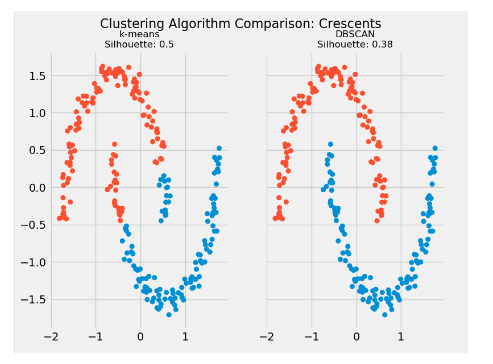

### ARI (Adjusted rand index)
- Unlike the silhouette coefficient, the ARI uses true cluster assignments to measure the similarity between true and predicted labels.

In [ ]:
# Now using alternate scoring ARI - scoring against true labels

ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

print(f"ari_kmeans: {ari_kmeans}")
print(f"ari_dbscan: {ari_dbscan} -> higher value is better, 1 is the perfect fit")

ari_kmeans: 0.4712270735157155
ari_dbscan: 1.0 -> higher value is better, 1 is the perfect fit


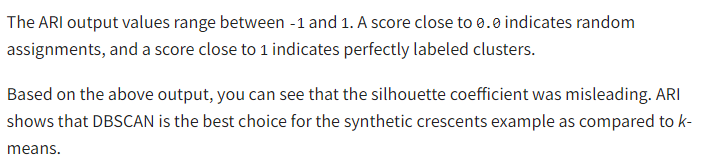

## Using KMeans Clustering with the real dataset
- The Cancer Genome Atlas (TCGA) Pan-Cancer analysis project

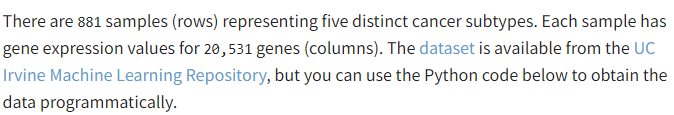

### Building KMeans clustering Pipeline
- multiple transformation prior to fitting data to the model

In [ ]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
# Download dataset from TCGA dataset from UCI:

uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

# Build the url
full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

# Download the file
r = urllib.request.urlretrieve(full_download_url, archive_name)

# Extract data from archive
tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

#### This will download the data in this format <br>

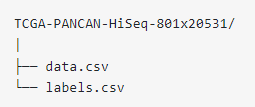

In [ ]:
# data file contains 881 rows & 20531 columns

datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"

# KMeans in sklearn requires "numpy array" as an argument
## turn the data csv to numpy array

data = np.genfromtxt(datafile,
                      delimiter=",",
                      usecols=range(1, 20532),
                      skip_header=1
                      )
data[0:5, 0:5]

array([[ 0.        ,  2.01720929,  3.26552691,  5.47848651, 10.43199896],
       [ 0.        ,  0.59273209,  1.58842082,  7.58615674,  9.62301086],
       [ 0.        ,  3.51175898,  4.32719872,  6.88178696,  9.87072997],
       [ 0.        ,  3.66361787,  4.50764878,  6.65906827, 10.19618407],
       [ 0.        ,  2.65574107,  2.82154696,  6.53945353,  9.73826456]])

In [ ]:
true_label_names = np.genfromtxt(labels_file,
                                 delimiter=",",
                                 usecols=(1,),
                                 skip_header=1,
                                 dtype='str')
true_label_names[0:5]

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA'], dtype='<U4')

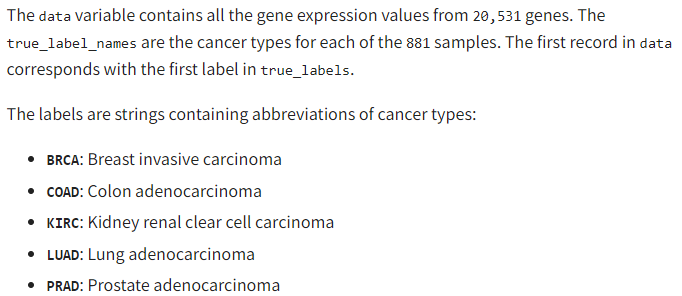

In [ ]:
# To use labels in the model -> need to transform to number

label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)
true_labels[0:5]

array([4, 3, 4, 4, 0])

In [ ]:
# With label encoder -> list the unique labels

label_encoder.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

In [ ]:
# determine the cluster by the type of Cancer 

n_clusters = len(label_encoder.classes_)
n_clusters

5

**Dimensional Reduction - used in case there are too many features** 
- In this case, 20,531 features

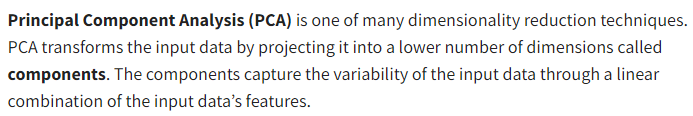

In [ ]:
# Build the sklearn pipeline i.e. set of transformation steps

preprocessor = Pipeline(
    [        
            ("scaler", MinMaxScaler()),
            ("pca", PCA(n_components=2, random_state=42))        
    ]
)

In [ ]:
# Build K-means clustering pipeline

clusterer = Pipeline(
    [
        (
            "kmeans", KMeans(
            n_clusters=n_clusters,
            init="k-means++",
            n_init=50,
            max_iter=500,
            random_state=42
            )
        )
    ]
)

In [ ]:
# Pipe together several pipes

pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [ ]:
# Now fit the data through the pipe

pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [ ]:
preprocessed_data = pipe["preprocessor"].transform(data)
preprocessed_data[0:5]

array([[ -5.66814062,  -8.87213883],
       [ -1.47020396,  10.28018174],
       [-10.84538683,  -1.34535227],
       [ -9.16796109,  -8.67012314],
       [ -6.27184805,  -3.10120752]])

In [ ]:
predicted_labels = pipe["clusterer"]["kmeans"].labels_
predicted_labels[0:5]

array([3, 2, 0, 3, 0], dtype=int32)

In [ ]:
# Not that calculation of 'silhouette score' -> requires only data & prediction (no true labels)

silhouette_score(preprocessed_data, predicted_labels)

0.5118775528450308

In [ ]:
# In case the "True Labels" are know -> use the "ARI" -> requires [True Label, Predicted Labels]

adjusted_rand_score(true_labels, predicted_labels)

0.722276752060253

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


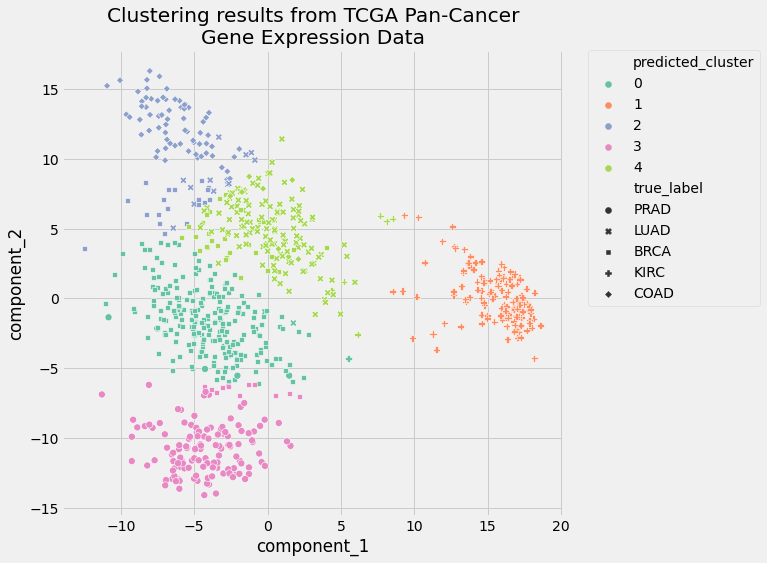

In [ ]:
# Plot to see the data

pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA Pan-Cancer\nGene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [ ]:
pcadf.head(10)

,component_1,component_2,predicted_cluster,true_label
0,-5.668141,-8.872139,3,PRAD
1,-1.470204,10.280182,2,LUAD
2,-10.845387,-1.345352,0,PRAD
3,-9.167961,-8.670123,3,PRAD
4,-6.271848,-3.101208,0,BRCA
5,-3.027348,-9.670582,3,PRAD
6,9.873068,-2.834859,1,KIRC
7,1.563953,-10.541258,3,PRAD
8,-2.793361,2.923376,4,BRCA
9,-6.033572,-12.945810,3,PRAD


In [ ]:
# This code is self-added -> to see the Predicted Label description instead of the encoding

pcadf['predicted_labels'] = label_encoder.inverse_transform(pcadf['predicted_cluster'])
pcadf.head()

,component_1,component_2,predicted_cluster,true_label,predicted_labels
0,-5.668141,-8.872139,3,PRAD,LUAD
1,-1.470204,10.280182,2,LUAD,KIRC
2,-10.845387,-1.345352,0,PRAD,BRCA
3,-9.167961,-8.670123,3,PRAD,LUAD
4,-6.271848,-3.101208,0,BRCA,BRCA


In [ ]:
pcadf.columns

Index(['component_1', 'component_2', 'predicted_cluster', 'true_label',
       'predicted_labels'],
      dtype='object')

In [ ]:
pcadf = pcadf[['component_1','component_2','predicted_cluster','predicted_labels', 'true_label', ]]

## Parameter Tuning

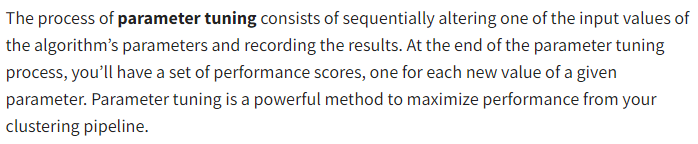

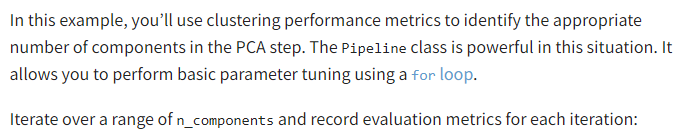

In [ ]:

# Empty lists to hold evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
    # This set the number of components for pca,
    # but leaves other steps unchanged
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(data)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(data),
        pipe["clusterer"]["kmeans"].labels_,
    )
    ari = adjusted_rand_score(
        true_labels,
        pipe["clusterer"]["kmeans"].labels_,
    )

    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


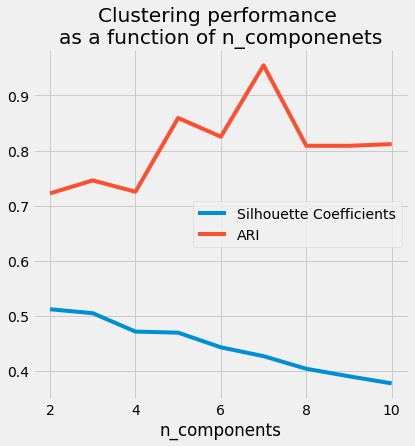

In [ ]:
# Plot the performance from changing parameters

plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,6))

sns.lineplot(range(2,11),
            silhouette_scores,
            color='#008fd5',
            label='Silhouette Coefficients'
            )

sns.lineplot(range(2,11),
             ari_scores,
             color="#fc4f30",
             label='ARI'
             )

plt.xlabel('n_components')
plt.legend()
plt.title('Clustering performance \nas a function of n_componenets')
#plt.tight_layout()
plt.show()

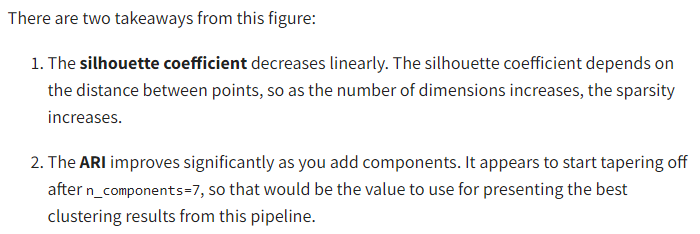